## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
import tensorflow as tf
import seaborn as sns


import pickle


## Loading data

In [ ]:
!wget --header="Host: doc-0c-4k-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_mm5pe75pf4mhpbdikb2k80b74s62g311_nonce=8volkihdnjj2q" --header="Connection: keep-alive" "https://doc-0c-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/emqb95ccpu6a0r42qaro4k34tem8p1s9/1643606700000/08255761277798433337/08255761277798433337/1_exO0JIa-E6JAwyMUAvtb1qQqYD9BUUm?e=download&authuser=0&nonce=8volkihdnjj2q&user=08255761277798433337&hash=j2ck7om513tr5r44u4asi1p0e4477c06" -c -O 'dog-breed-identification.zip'

--2022-01-31 05:26:16--  https://doc-0c-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/emqb95ccpu6a0r42qaro4k34tem8p1s9/1643606700000/08255761277798433337/08255761277798433337/1_exO0JIa-E6JAwyMUAvtb1qQqYD9BUUm?e=download&authuser=0&nonce=8volkihdnjj2q&user=08255761277798433337&hash=j2ck7om513tr5r44u4asi1p0e4477c06
Resolving doc-0c-4k-docs.googleusercontent.com (doc-0c-4k-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-0c-4k-docs.googleusercontent.com (doc-0c-4k-docs.googleusercontent.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 724495926 (691M) [application/zip]
Saving to: ‘dog-breed-identification.zip’

dog-breed-identific 100%[===================>] 690.93M  59.4MB/s    in 16s     

2022-01-31 05:26:32 (43.6 MB/s) - ‘dog-breed-identification.zip’ saved [724495926/724495926]



In [ ]:
!unzip dog-breed-identification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

## Load Best Model

In [28]:
!wget --header="Host: doc-0g-4k-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_mm5pe75pf4mhpbdikb2k80b74s62g311_nonce=v37apm1it9vr2" --header="Connection: keep-alive" "https://doc-0g-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/rrr46ugtsvids3u8e9durijathmnn5vc/1643814975000/08255761277798433337/08255761277798433337/1fiiRvSiqn_6zBwSfX1MenklAR8adY3Fe?e=download&authuser=0&nonce=v37apm1it9vr2&user=08255761277798433337&hash=a1h9kcqtsmvlnmhsklvbpegg320eq6li" -c -O 'weights-03-0.8000.hdf5'

--2022-02-02 15:16:40--  https://doc-0g-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/rrr46ugtsvids3u8e9durijathmnn5vc/1643814975000/08255761277798433337/08255761277798433337/1fiiRvSiqn_6zBwSfX1MenklAR8adY3Fe?e=download&authuser=0&nonce=v37apm1it9vr2&user=08255761277798433337&hash=a1h9kcqtsmvlnmhsklvbpegg320eq6li
Resolving doc-0g-4k-docs.googleusercontent.com (doc-0g-4k-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0g-4k-docs.googleusercontent.com (doc-0g-4k-docs.googleusercontent.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94770200 (90M) [application/octet-stream]
Saving to: ‘weights-03-0.8000.hdf5’

weights-03-0.8000.h 100%[===================>]  90.38M   174MB/s    in 0.5s    

2022-02-02 15:16:41 (174 MB/s) - ‘weights-03-0.8000.hdf5’ saved [94770200/94770200]



In [ ]:
## Read the model
from tensorflow.keras.models import load_model
model = load_model('weights-03-0.8000.hdf5')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Layer (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['Input_Layer[0][0]']            
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

## Load Label Encoder used while Training

In [29]:
!wget --header="Host: doc-10-4k-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_mm5pe75pf4mhpbdikb2k80b74s62g311=08255761277798433337|1643814975000|b4vifl9l3jbtanr5h6iat7sbir5c9nto" --header="Connection: keep-alive" "https://doc-10-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/mgqh9v4eth4cshmmkoks9rsc3lcod402/1643814975000/08255761277798433337/08255761277798433337/1OOcOwIkaej5JWpC9wVZJXabDdoTeZRRk?e=download&authuser=0" -c -O 'Label_Encoder.pkl'

--2022-02-02 15:17:09--  https://doc-10-4k-docs.googleusercontent.com/docs/securesc/lo66ka9s3k9ovif7kku17kum7962ok4j/mgqh9v4eth4cshmmkoks9rsc3lcod402/1643814975000/08255761277798433337/08255761277798433337/1OOcOwIkaej5JWpC9wVZJXabDdoTeZRRk?e=download&authuser=0
Resolving doc-10-4k-docs.googleusercontent.com (doc-10-4k-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-10-4k-docs.googleusercontent.com (doc-10-4k-docs.googleusercontent.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2690 (2.6K) [application/octet-stream]
Saving to: ‘Label_Encoder.pkl’

Label_Encoder.pkl   100%[===================>]   2.63K  --.-KB/s    in 0s      

2022-02-02 15:17:10 (122 MB/s) - ‘Label_Encoder.pkl’ saved [2690/2690]



In [ ]:
le = pickle.load(open("Label_Encoder.pkl", 'rb'))

## Pre-process data

In [ ]:
UNIQUE_CLASSES = 120
HEIGHT = 224
WIDTH = 224
def preprocess_image(filepath):
    #reading path
    image_string = tf.io.read_file(filepath)
    #decoding image
    image = tf.image.decode_jpeg(image_string, channels=3)
    # image = tfio.experimental.image.decode_tiff(image_string)
    # This will convert to float values in [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    #resize the image
    image = tf.image.resize(image, [WIDTH, HEIGHT])
    #reshape the tensor
    image = tf.expand_dims(image, axis=0)
    # print(image.shape)
    return image

## Predict function

In [ ]:
def predict_dog_breed(image):
  
  # print(image.shape)
  class_probabilities = model.predict(image)
  predicted_index= np.argmax(class_probabilities, axis=1)
  breed = le.inverse_transform(predicted_index)
  return breed

## Final function

test/9a1e9db30803e52c949f8490cdb91332.jpg
Took 0.16929411888122559 seconds to predict


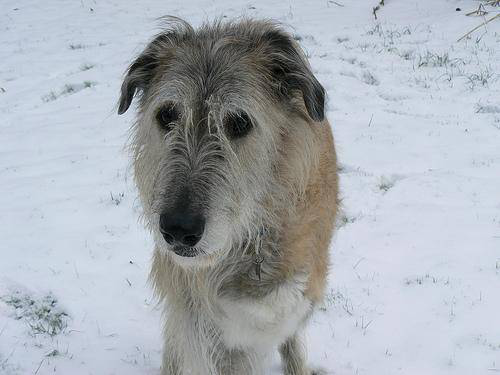

Breed :  irish_wolfhound


array(['irish_wolfhound'], dtype=object)

In [ ]:
import time
from PIL import Image
import os

def final(image_path_for_prediction):
  
  start = time.time()

  # image_path_for_prediction = 'test/000bec180eb18c7604dcecc8fe0dba07.jpg'
  
  # pre-process data
  image = preprocess_image(image_path_for_prediction)

  # predict
  breed = predict_dog_breed(image)

  end = time.time()
  print("Took {0} seconds to predict".format(end - start))

  im = Image.open(image_path_for_prediction)
  display(im)

  print("Breed : ", breed[0])

  return breed


img_path = 'test/' + os.listdir('test/')[6]
print(img_path)
final(img_path)


## Streamlit

In [ ]:
!pip install streamlit
!pip install pyngrok

     |████████████████████████████████| 9.7 MB 5.0 MB/s 
     |████████████████████████████████| 76 kB 4.1 MB/s 
     |████████████████████████████████| 164 kB 69.8 MB/s 
     |████████████████████████████████| 180 kB 72.9 MB/s 
     |████████████████████████████████| 111 kB 45.0 MB/s 
     |████████████████████████████████| 4.3 MB 34.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 128 kB 58.5 MB/s 
     |████████████████████████████████| 792 kB 52.0 MB/s 
     |████████████████████████████████| 375 kB 58.1 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=a0308e4d9f45c08cebaa7467a6e9e94d3b784e372a7a44f3c33188278811af51
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      S

     |████████████████████████████████| 745 kB 4.9 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=3ce096a289b8c71bc01b3badd672fcc734bb6e89cf496dcfb29d98f0f97e472f
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [44]:
%%writefile app.py
import streamlit as st
import time
from PIL import Image
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle

from tensorflow.keras.models import load_model


UNIQUE_CLASSES = 120
HEIGHT = 224
WIDTH = 224
def preprocess_image(filepath):
  #reading path
  image_string = tf.io.read_file(filepath)
  #decoding image
  image = tf.image.decode_jpeg(image_string, channels=3)
  # image = tfio.experimental.image.decode_tiff(image_string)
  # This will convert to float values in [0, 1]
  image = tf.image.convert_image_dtype(image, tf.float32)
  #resize the image
  image = tf.image.resize(image, [WIDTH, HEIGHT])
  #reshape the tensor
  image = tf.expand_dims(image, axis=0)
  # print(image.shape)
  return image

def predict_dog_breed(image):
  
  # print(image.shape)
  model = load_model('weights-03-0.8000.hdf5')
  le = pickle.load(open("Label_Encoder.pkl", 'rb'))

  class_probabilities = model.predict(image)
  predicted_index= np.argmax(class_probabilities, axis=1)
  breed = le.inverse_transform(predicted_index)
  return breed


def final(image_path_for_prediction):
  
  # pre-process data
  image = preprocess_image(image_path_for_prediction)

  # predict
  breed = predict_dog_breed(image)

  print("Breed : ", breed[0])

  return breed

def main():
  st.title("Dog Breed Classification")	
 
  image_file = st.file_uploader("Upload An Image of a Dog",type=['png','jpeg','jpg'])
  if image_file is not None:
    file_details = {"FileName":image_file.name,"FileType":image_file.type}
    # st.write(file_details)
    img = Image.open(image_file)
    st.image(img, caption = "Uploaded Image")
    # with open(os.path.join("temp",image_file.name),"wb") as f:
    #   f.write(image_file.getbuffer())

    img.save('uploaded_pic.jpg', 'JPEG')
      
    breed = final('uploaded_pic.jpg')
    st.success("Predicted Breed:" + breed)
if __name__ == '__main__':
  main()

Overwriting app.py


In [ ]:
!streamlit run app.py --server.enableWebsocketCompression=false & npx localtunnel --port 8501 